# 第三次实战：TensorFlow-Keras构建深度神经网络分类模型

In [1]:
# 导入
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=6, micro=10, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.22.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 实战开始

### 数据读取和展示

In [2]:
# 导入数据集fashion mnist
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
# 数据归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

### 深度神经网络构建

In [4]:
model = keras.models.Sequential()
# 构建模型
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 模型编译，固化模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [6]:
# 回调函数
# 定义文件夹和文件
logdir = os.path.join('dnn-callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashion_mnist_model.h5')

# 定义回调函数
callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir,profile_batch = 100000000),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]
history = model.fit(x_train_scaled,y_train,epochs=10,
                             validation_data=(x_valid_scaled,y_valid),
                             callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 232us/sample - loss: 2.0883 - accuracy: 0.2300 - val_loss: 1.1854 - val_accuracy: 0.4528
Epoch 2/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.9272 - accuracy: 0.6212 - val_loss: 0.6468 - val_accuracy: 0.7752
Epoch 3/10
55000/55000 [==============================] - 12s 210us/sample - loss: 0.6012 - accuracy: 0.7955 - val_loss: 0.5099 - val_accuracy: 0.8370
Epoch 4/10
55000/55000 [==============================] - 11s 208us/sample - loss: 0.4775 - accuracy: 0.8378 - val_loss: 0.4640 - val_accuracy: 0.8442
Epoch 5/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.4222 - accuracy: 0.8551 - val_loss: 0.4479 - val_accuracy: 0.8482
Epoch 6/10
55000/55000 [==============================] - 13s 232us/sample - loss: 0.3835 - accuracy: 0.8671 - val_loss: 0.4008 - val_accuracy: 0.8630
Epoch 7/10
55000/55000 [=====================

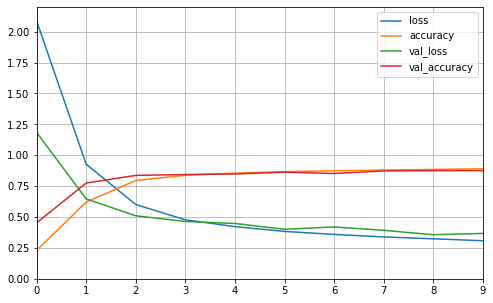

In [7]:
# 画图展示学习曲线图
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2.2)
    plt.show()
    
plot_learning_curves(history)

In [ ]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)

### 实现批归一化

In [9]:
model = keras.models.Sequential()
# 构建模型
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='relu'))
    # 添加批归一化层
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation='softmax'))

# 模型编译，固化模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)              

In [11]:
logdir = os.path.join('dnn-bn-callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashion_mnist_model.h5')

# 定义回调函数
callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir,profile_batch = 100000000),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]
history_bn = model.fit(x_train_scaled,y_train,epochs=10,
                             validation_data=(x_valid_scaled,y_valid),
                             callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 60s 1ms/sample - loss: 1.0961 - accuracy: 0.6136 - val_loss: 0.6769 - val_accuracy: 0.7478
Epoch 2/10
55000/55000 [==============================] - 52s 944us/sample - loss: 0.7713 - accuracy: 0.7241 - val_loss: 0.5596 - val_accuracy: 0.7992
Epoch 3/10
55000/55000 [==============================] - 52s 950us/sample - loss: 0.6598 - accuracy: 0.7662 - val_loss: 0.4977 - val_accuracy: 0.8278
Epoch 4/10
55000/55000 [==============================] - 53s 958us/sample - loss: 0.6042 - accuracy: 0.7881 - val_loss: 0.4502 - val_accuracy: 0.8368
Epoch 5/10
55000/55000 [==============================] - 55s 1000us/sample - loss: 0.5565 - accuracy: 0.8088 - val_loss: 0.4240 - val_accuracy: 0.8486
Epoch 6/10
55000/55000 [==============================] - 52s 948us/sample - loss: 0.5284 - accuracy: 0.8144 - val_loss: 0.4087 - val_accuracy: 0.8512
Epoch 7/10
55000/55000 [======================

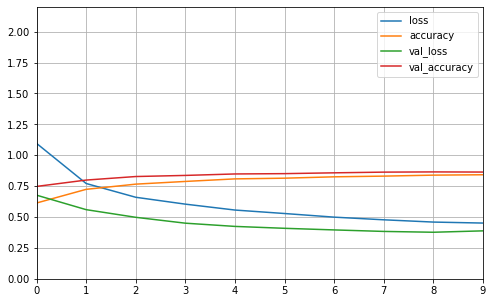

In [12]:
plot_learning_curves(history_bn)

In [ ]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)

### 更改激活函数

In [13]:
model = keras.models.Sequential()
# 构建模型
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 模型编译，固化模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_43 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_45 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_46 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_47 (Dense)             (None, 100)              

In [15]:
logdir = os.path.join('dnn-selu-callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashion_mnist_model.h5')

# 定义回调函数
callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir,profile_batch = 100000000),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]
history_selu = model.fit(x_train_scaled,y_train,epochs=10,
                             validation_data=(x_valid_scaled,y_valid),
                             callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 17s 311us/sample - loss: 0.5631 - accuracy: 0.7943 - val_loss: 0.4281 - val_accuracy: 0.8422
Epoch 2/10
55000/55000 [==============================] - 15s 273us/sample - loss: 0.4109 - accuracy: 0.8489 - val_loss: 0.3859 - val_accuracy: 0.8590
Epoch 3/10
55000/55000 [==============================] - 14s 263us/sample - loss: 0.3665 - accuracy: 0.8643 - val_loss: 0.3696 - val_accuracy: 0.8624
Epoch 4/10
55000/55000 [==============================] - 15s 273us/sample - loss: 0.3391 - accuracy: 0.8742 - val_loss: 0.3893 - val_accuracy: 0.8600
Epoch 5/10
55000/55000 [==============================] - 16s 284us/sample - loss: 0.3192 - accuracy: 0.8817 - val_loss: 0.3408 - val_accuracy: 0.8776
Epoch 6/10
55000/55000 [==============================] - 16s 287us/sample - loss: 0.3026 - accuracy: 0.8873 - val_loss: 0.3602 - val_accuracy: 0.8694
Epoch 7/10
55000/55000 [=====================

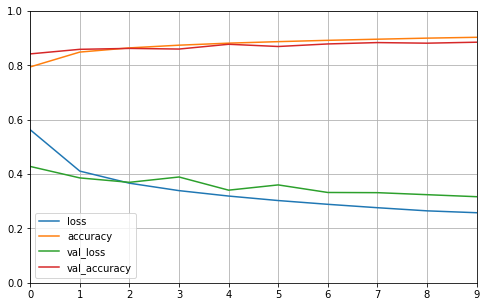

In [17]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history_selu)

In [ ]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)

### 添加Dropout

AlphaDropout的好处：
- 均值和方差不变
- 归一化性质也不变

In [18]:
model = keras.models.Sequential()
# 构建模型
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='selu'))
model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

# 模型编译，固化模型
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_64 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_65 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_66 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_67 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_68 (Dense)             (None, 100)              

In [20]:
logdir = os.path.join('dnn-selu-dropout-callbacks')
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,'fashion_mnist_model.h5')

# 定义回调函数
callbacks = [
    keras.callbacks.TensorBoard(log_dir=logdir,profile_batch = 100000000),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),
]
history_selu_dropout = model.fit(x_train_scaled,y_train,epochs=10,
                             validation_data=(x_valid_scaled,y_valid),
                             callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 17s 309us/sample - loss: 0.6895 - accuracy: 0.7696 - val_loss: 0.5918 - val_accuracy: 0.8446
Epoch 2/10
55000/55000 [==============================] - 15s 269us/sample - loss: 0.4520 - accuracy: 0.8457 - val_loss: 0.6115 - val_accuracy: 0.8560
Epoch 3/10
55000/55000 [==============================] - 16s 289us/sample - loss: 0.4024 - accuracy: 0.8607 - val_loss: 0.6652 - val_accuracy: 0.8564
Epoch 4/10
55000/55000 [==============================] - 16s 287us/sample - loss: 0.3710 - accuracy: 0.8705 - val_loss: 0.5322 - val_accuracy: 0.8738
Epoch 5/10
55000/55000 [==============================] - 15s 277us/sample - loss: 0.3482 - accuracy: 0.8785 - val_loss: 0.5127 - val_accuracy: 0.8658
Epoch 6/10
55000/55000 [==============================] - 15s 271us/sample - loss: 0.3247 - accuracy: 0.8850 - val_loss: 0.5553 - val_accuracy: 0.8746
Epoch 7/10
55000/55000 [=====================

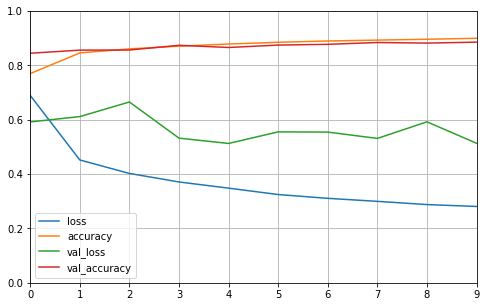

In [21]:
plot_learning_curves(history_selu_dropout)

In [ ]:
# 在测试集上进行指标评估
model.evaluate(x_test_scaled,y_test)